# Fáza 3 IAU - Daniela Paľuchová 50%, Mark Bartalos 50% 

Vyriešené veci z predchádzajúcej fázy

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import export_graphviz
from sklearn import tree
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from datetime import datetime
import numpy as np
import scipy.stats as stats
import category_encoders as ce
from graphviz import Source
from IPython.display import SVG
from IPython.display import HTML
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

In [93]:
training = pd.read_csv("trenovaci.csv", sep=',')
target = pd.read_csv("trenovaci_target.csv", sep=',')
training

,pct_wild_mouse,screen_height,pct_input,pct_scrandom,pct_scroll_move,pct_click_product_info,wild_mouse_duration,total_load_time,pct_click,screen_width,...,scroll_move_total_rel_distance,page_activity_duration,mouse_move_total_rel_distance,browser_name,pct_rage_click,session_duration,pct_mouse_click,job,race,age
0,59.56562,2,0.05917,48.05874,39.37553,66.21904,13.32802,5.93412,19.29164,2,...,21.28298,18.00126,15.52013,6,41.19641,106.97645,16.06948,3,1,60
1,57.12588,5,0.62610,27.98295,41.97408,58.58313,15.04745,4.19728,12.80114,1,...,18.49826,17.48769,13.88568,4,40.01657,135.12413,18.11505,3,1,60
2,36.23258,5,0.87819,44.02044,46.59896,34.35303,15.35850,2.70523,17.26037,5,...,13.42086,14.73291,16.61463,4,53.41472,92.40541,12.91460,3,1,60
3,58.97383,6,0.81044,30.68743,48.43406,23.69275,15.28388,0.58036,17.37618,2,...,9.02703,16.93843,18.35554,5,33.63685,105.09470,12.93503,3,1,60
4,57.85999,5,2.63628,68.71277,71.42763,60.38453,16.41097,3.62692,17.62559,1,...,15.85784,16.09055,17.97986,5,60.64751,183.27447,13.37094,285,4,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8764,37.74552,2,0.63719,61.95955,63.46325,58.79444,15.06358,2.21992,19.95583,3,...,17.53210,16.06603,18.62954,6,40.75720,165.09875,11.59283,3,1,60
8765,56.42685,3,1.59755,28.62159,54.13486,58.15269,15.92552,1.96973,19.25071,2,...,20.48997,14.90900,15.72821,2,47.52506,231.75373,17.37766,360,1,60
8766,44.90033,6,9.91172,33.11470,40.71179,57.39854,17.71756,6.58752,14.44883,2,...,10.07043,16.74973,13.77309,5,43.87094,117.20051,13.22402,3,1,60
8767,54.28177,1,2.28241,43.51204,49.60014,75.44521,16.27053,1.13558,17.38237,2,...,18.51279,16.13312,20.78427,5,67.75252,160.45967,15.12488,3,1,60


## OneR 

In [94]:
X_train, X_test, y_train, y_test = train_test_split(training, target, test_size=0.2, random_state=42)

y_test = pd.DataFrame(y_test)

In [95]:
def create_rule(data, y_train):
    rules = {}
    for feature in data.columns:
        best_accuracy = 0
        best_rule = None
        unique_values = data[feature].unique()
        for value in unique_values:
            rule = (feature, value)

            predictions = data[feature] == value
            # Here we see how our unique value influences the accuracy of the prediction, we use this as basis of mesuring
            # in what % matches the unique values's position in the data with the target value
            accuracy = accuracy_score(y_train['ack'], predictions)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_rule = rule
            
        rules[feature] = best_rule
    
    return rules


def predict(X_test, rules, best_feature):
    feature, value = rules[best_feature]
    return (X_test[feature] == value).astype(int)

def select_best_feature(rules):
    best_feature = max(rules, key=lambda x: rules[x][1])
    return best_feature

def bin_data(data):
    data = data.copy()
    for feature in data.columns:
        if data[feature].dtype in [np.float64, np.float32, np.int64, np.int32]:
            data[feature] = pd.qcut(data[feature], q=4, duplicates='drop', labels=False)
    return data

def one_r_classifier(X_train, y_train):
    X_train = X_train.copy()
    X_train_binned = bin_data(X_train)
    rules = create_rule(X_train_binned, y_train)
    best_feature = select_best_feature(rules)
    print(rules)
    return rules, best_feature


def one_r_classifier_recursive(X_train, y_train, selected_features=None, best_rules=None, max_features=None):
    if selected_features is None:
        selected_features = []
    if best_rules is None:
        best_rules = {}

    if max_features is not None and len(selected_features) >= max_features:
        return best_rules, selected_features

    # Probably dont have to do this every iteration
    X_train_binned = bin_data(X_train)
    rules = create_rule(X_train_binned.drop(columns=selected_features), y_train)
    best_feature = select_best_feature(rules)

    if best_feature is None or best_feature in selected_features:
        return best_rules, selected_features

    best_rules[best_feature] = rules[best_feature]
    selected_features.append(best_feature)

    return one_r_classifier_recursive(X_train, y_train, selected_features, best_rules, max_features)


def multiple_predict(X_test, selected_features, rules):
    X_test = pd.DataFrame(X_test, columns=selected_features)
   
    predictions = pd.DataFrame(index=X_test.index)
    for feature in selected_features:
        _, rule_value = rules[feature]
        predictions[feature] = (X_test[feature] == rule_value).astype(int)

    # Majority voting
    final_prediction = predictions.mode(axis=1)[0]  # 0 if tied
    return final_prediction

X_train, X_test, y_train, y_test = train_test_split(training, target, test_size=0.2, random_state=42)

y_test = pd.DataFrame(y_test)

rules, best_feature = one_r_classifier(X_train, y_train)
X_test_binned = bin_data(X_test)

predictions = predict(X_test_binned, rules, best_feature)
print("Accuracy single:", metrics.accuracy_score(y_test, predictions))
print("Precision signle:", precision_score(y_test, predictions, average='macro'))
print("Recall single:", recall_score(y_test, predictions, average='macro'))

print("---------------------------------------------")
multiple_rules, selected_features = one_r_classifier_recursive(X_train, y_train, max_features=5)
multiple_predictions = multiple_predict(X_test_binned, selected_features, multiple_rules)
print("Accuracy multiple:", metrics.accuracy_score(y_test, multiple_predictions))
print("Precision multiple:", precision_score(y_test, multiple_predictions, average='macro'))
print("Recall multiple:", recall_score(y_test, multiple_predictions, average='macro'))




{'pct_wild_mouse': ('pct_wild_mouse', 0), 'screen_height': ('screen_height', 0), 'pct_input': ('pct_input', 1), 'pct_scrandom': ('pct_scrandom', 0), 'pct_scroll_move': ('pct_scroll_move', 0), 'pct_click_product_info': ('pct_click_product_info', 0), 'wild_mouse_duration': ('wild_mouse_duration', 1), 'total_load_time': ('total_load_time', 1), 'pct_click': ('pct_click', 2), 'screen_width': ('screen_width', 0), 'pct_doubleclick': ('pct_doubleclick', 1), 'product_ean': ('product_ean', 2), 'pct_mouse_move': ('pct_mouse_move', 0), 'user_id': ('user_id', 2), 'session_id': ('session_id', 3), 'pct_scroll_move_duration': ('pct_scroll_move_duration', 3), 'scroll_move_total_rel_distance': ('scroll_move_total_rel_distance', 2), 'page_activity_duration': ('page_activity_duration', 2), 'mouse_move_total_rel_distance': ('mouse_move_total_rel_distance', 2), 'browser_name': ('browser_name', 1), 'pct_rage_click': ('pct_rage_click', 1), 'session_duration': ('session_duration', 3), 'pct_mouse_click': ('pct_

Táto implementácia klasifikátora 1R generuje pravidlá predikcie pre každý atribút a potom vyberie najlepší atribút predikcie. Na rozdelenie údajov, používa sa binning, táto funkcia rozdeľuje údaje do menšieho počtu kategórií (presne 4). Pre viac atribútov sa snažíme rekurzívne nájsť požadovaný počet atribútov. Na predikciu sa všetky tieto vlastnosti používajú vo funkcii `multiple_predict`.

## Trénovanie a vyhodnotenie klasifikátorov strojového učenia

In [96]:
X_train, X_test, y_train, y_test = train_test_split(training, target, test_size=0.2, random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


In [97]:
linear_c = LinearDiscriminantAnalysis()
linear_c=linear_c.fit(X_train, y_train)
prediction_linear = linear_c.predict(X_test)

/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
print(classification_report(y_test, prediction_linear, digits=3, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0      0.844     0.762     0.801       819
           1      0.808     0.877     0.841       935

    accuracy                          0.823      1754
   macro avg      0.826     0.819     0.821      1754
weighted avg      0.825     0.823     0.822      1754



In [99]:
print("accuracy is ",metrics.accuracy_score(y_test, prediction_linear))

accuracy is  0.8232611174458381


In [100]:
print("precision is ",metrics.precision_score(y_test, prediction_linear))

precision is  0.8078817733990148


In [101]:
print("recall is ",metrics.recall_score(y_test, prediction_linear))

recall is  0.8770053475935828


Natrénovali sme si model pomocou Linear Discriminant Analysis, ukazali sme si classification report a vyhodnotili sme natrénované modeli pomocou accuraci, precision a recall. Podľa výsledkov môžeme vidieť, že výsledky sú dobré.

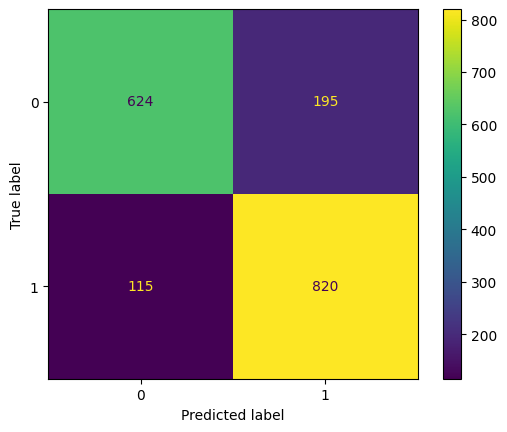

In [102]:
matrix1=confusion_matrix(y_test, prediction_linear)
ConfusionMatrixDisplay(matrix1).plot()

Na grafe môžeme vidieť predikované hodnoty (predicted label) a spravne hodnoty (true label) ack. Vidíme na ňom, že vo veľa prípadoch priradil správnu hodnotu. Nespávne vyhodnotených nie je až tak veľa, však viac je takých, že správna hodnota bola 0 a vyhodnotil ju ako 1.

In [103]:
forest_c=RandomForestClassifier()
forest_c=forest_c.fit(X_train,y_train)
prediction2=forest_c.predict(X_test)

/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [104]:
print(classification_report(y_test, prediction2, digits=3, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0      0.938     0.916     0.926       819
           1      0.928     0.947     0.937       935

    accuracy                          0.932      1754
   macro avg      0.933     0.931     0.932      1754
weighted avg      0.932     0.932     0.932      1754



In [105]:
print("accuracy is ",metrics.accuracy_score(y_test, prediction2))

accuracy is  0.9321550741163056


In [106]:
print("precision is ",metrics.precision_score(y_test, prediction2))

precision is  0.9276729559748428


In [107]:
print("recall is ",metrics.recall_score(y_test, prediction2))

recall is  0.946524064171123


Nasledne sme si natrénovali model pomocou random forest classifier, ukazali sme si classification report a vyhodnotili sme natrénované modeli pomocou accuraci, precision a recall. Podľa výsledkov môžeme vidieť, že výsledky sú velmi dobré. 

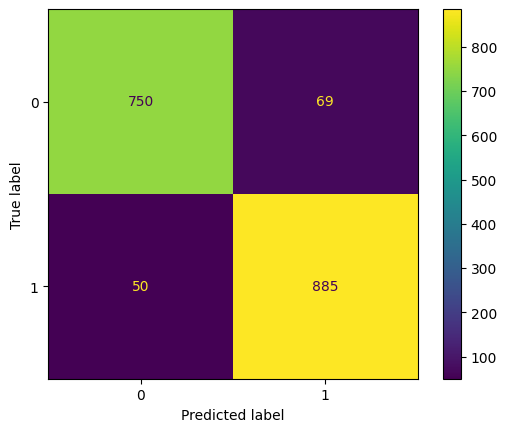

In [108]:
matrix1=confusion_matrix(y_test, prediction2)
ConfusionMatrixDisplay(matrix1).plot()

Na grafe môžeme vidieť predikované hodnoty (predicted label) a spravne hodnoty (true label) ack. Vidíme na ňom, že vo veľa prípadoch priradil správnu hodnotu. Nesprávne vyhodnotených nie je až tak veľa, však viac je takých, že správna hodnota bola 0 a vyhodnotil ju ako 1.

In [109]:
tree = forest_c.estimators_[0]
plt.figure(figsize=(50, 10))
plot_tree(tree,
          filled=True,
          feature_names=X_test.columns,
          class_names=['0', '1']) 
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['pct_wild_mouse', 'screen_height', 'pct_input', 'pct_scrandom',
       'pct_scroll_move', 'pct_click_product_info', 'wild_mouse_duration',
       'total_load_time', 'pct_click', 'screen_width', 'pct_doubleclick',
       'product_ean', 'pct_mouse_move', 'user_id', 'session_id',
       'pct_scroll_move_duration', 'scroll_move_total_rel_distance',
       'page_activity_duration', 'mouse_move_total_rel_distance',
       'browser_name', 'pct_rage_click', 'session_duration', 'pct_mouse_click',
       'job', 'race', 'age'],
      dtype='object') instead.

<Figure size 5000x1000 with 0 Axes>

Vyššie môžete vidieť farebnú vizualizáciu prvého stromu a algoritme random forest

Porovnanie Linear Discriminant Analysis a Random Forest:

Random Forest mal vo všetkých metrikách (accuracy, precision, recall) lepšie hodnotenie ako Linear Discriminant Analysis, takže je pre nás výhodnejší. Výhodnejší je v každej metrike cca od 7% do 12%

Porovnanie s vytvoreným OneR

Náš OneR mal horšie hodnotenie vo všetkých metrikách ako RandomForest a aj Linear Discriminant Analysis. Náš vysledok je, že OneR je nevýdodnejší ako klasifikátori, ktoré sme skúšali.

## Optimalizácia alias hyperparameter tuning

Budeme preskúmavať hyperparametre clasifikátora RandomForest, pretože nám v predchádzajúcej úlohe priniesol najlepšie výsledky. Vybrali sme si tieto parametre:
1. n_estimators - počet stromov v lese, predvolena hodnota je 100
2. min_samples_split - minimálny počet vzoriek potrebný na rozdelenie vnútorného uzla, predvolená hodnota je 2
3. min_samples_leaf - minimálny počet vzoriek požadovaný na to, aby bol v uzle listu, predvolená hodnota je 1

Skúšali sme aj s dalšími parametrami ako napríklad max_depth (maximálna hlbka stromu, predvolené None), max_leaf_nodes (najväčší počet listov, predvolené None), však tie skôr zmenšovali úspešnosť.

Random forest s predvolenými hodnotami:

In [ ]:
forest_class = RandomForestClassifier(n_estimators = 100,
                                      min_samples_split = 2,  
                                      min_samples_leaf = 1
                               ) 
forest_class = forest_class.fit(X_train,y_train) 
pridiction_default = forest_class.predict(X_test)

print("accuracy is ",metrics.accuracy_score(y_test, pridiction_default))

/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


accuracy is  0.9304446978335233


Následne ideme nájsť najlepší výsledok s menením hyperparametrov

In [ ]:
n_estimators = [10, 25, 50, 100, 250]
min_samples_leaf = [1, 2, 5, 10, 20] 
min_samples_split = [2, 5, 10, 20] 

parametersF=dict(n_estimators = n_estimators,  
             min_samples_leaf = min_samples_leaf,
             min_samples_split = min_samples_split 
            )

In [ ]:
grit_s = GridSearchCV(forest_class, parametersF, cv=5, n_jobs=-1, scoring="accuracy")
grit_s.fit(X_train, y_train)
print("best estimator is ", grit_s.best_estimator_)
print("score is ", grit_s.best_score_)

/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markbartalos/.virtualenvs/iau/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector 

best estimator is  RandomForestClassifier(n_estimators=250)
score is  0.9308624376336422


In [ ]:
random_s = RandomizedSearchCV(forest_class, parametersF, random_state=71, scoring="accuracy", cv=5)
random_s.fit(X_train, y_train)
print("best estimator is ", random_s.best_estimator_)
print("score is ", random_s.best_score_)

C:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConvers

best estimator is  RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=250)
score is  0.9290092658588739


Vyskúšali sme hľadanie najlepších hodnôt hyperparametrov dvoma technikami a to pomocou gridsearch a randomsearch, v obidvoch prípadoch sme si určili krížovú validáciu (cv=5), aby sme predišli preučeniu. V oboch prípadoch nám vyšlo, že n_estimators=250 a min_samples_split=5. V random search min_samples_leaf=2. V oboch prípadoch je úspešnosť nad 92%.

# Vyhodnotenie vplyvu zvolenej stratégie riešenia na klasifikáciu

Skopírujeme všetky funkcie čistenia údajov z predchádzajúcej fázy. Funkcia tvorby pipeline bola upravená tak, aby vyhovovala našim potrebám, aby sme mohli prepínať transformátory a škálovače.

In [ ]:
products = pd.read_csv("data/product.csv", sep='\t')
sessions = pd.read_csv("data/session.csv", sep='\t')
users = pd.read_csv("data/user.csv", sep='\t')

users = users.drop_duplicates(subset='user_id', keep='first')
users['race'] = users['race'].fillna('unspecified')
users['birthdate'] = pd.to_datetime(users['birthdate'], errors='coerce')
sessions['ack']=sessions['ack'].astype(int)
duplikatne_riadky = sessions[sessions.duplicated()]
sessions.drop_duplicates(inplace=True)
sessions['session_start'] = pd.to_datetime(sessions['session_start'], errors='coerce')

merged_data = pd.merge(sessions, users, on='user_id', how='left')

def replaceNaNmedian(merged_data):
    for column in merged_data.columns:
        number_NaN=merged_data[column].isna().sum()
        if 0<number_NaN:
           merged_data[column].fillna(merged_data[column].median(), inplace=True)
    return merged_data

def delete_outliers_quantile(merged_data):
    count=0
    for column in merged_data[['pct_doubleclick', 'pct_mouse_move', 'pct_scroll_move_duration', 'scroll_move_total_rel_distance', 'page_activity_duration', 'mouse_move_total_rel_distance', 'pct_rage_click', 'pct_mouse_click', 'pct_wild_mouse', 'pct_input', 'pct_scrandom', 'pct_scroll_move', 'pct_click_product_info', 'wild_mouse_duration', 'total_load_time', 'pct_click', 'session_duration']]:
        outliers = identify_outliers(merged_data[column])
        lower_q = merged_data[column].quantile(0.05)
        uper_q = merged_data[column].quantile(0.95)
        count+=outliers.count()
        merged_data[column] = merged_data[column].clip(lower_q, uper_q)
        
    print(f'Počet zmenenych hodnôt je {count}')
    return merged_data

def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]


def data_correction(merged_data):
    merged_data['age'] = ((datetime.now() - merged_data['birthdate']).dt.days / 365.25)
    merged_data['age'] = merged_data['age'].round()
    mean_age = merged_data['age'].mean()
    merged_data['age'].fillna(mean_age, inplace=True)
    merged_data['age'] = merged_data['age'].round().astype(int)

    if 'username' in merged_data.columns:
        merged_data.drop('username', axis='columns', inplace=True)
    if 'residence' in merged_data.columns:
        merged_data.drop('residence', axis='columns', inplace=True)
    if 'current_location' in merged_data.columns:
        merged_data.drop('current_location', axis='columns', inplace=True)
    if 'name' in merged_data.columns:
        merged_data.drop('name', axis='columns', inplace=True)
    if 'mail' in merged_data.columns:
        merged_data.drop('mail', axis='columns', inplace=True)
    if 'address' in merged_data.columns:
        merged_data.drop('address', axis='columns', inplace=True)
    if 'birthdate' in merged_data.columns:
        merged_data.drop('birthdate', axis='columns', inplace=True)
    if 'session_start' in merged_data.columns:
        merged_data.drop('session_start', axis='columns', inplace=True)
    if 'sex' in merged_data.columns:
        merged_data.drop('sex', axis='columns', inplace=True)

    merged_data['race'] = merged_data['race'].fillna('unspecified')
    merged_data['job'] = merged_data['job'].fillna('unspecified')
    merged_data=replaceNaNmedian(merged_data)

    ce_ordinal = ce.OrdinalEncoder(cols=['race'])
    merged_data= ce_ordinal.fit_transform(merged_data)
    ce_ordinal = ce.OrdinalEncoder(cols=['job'])
    merged_data= ce_ordinal.fit_transform(merged_data)
    ce_ordinal = ce.OrdinalEncoder(cols=['browser_name'])
    merged_data= ce_ordinal.fit_transform(merged_data)
    ce_ordinal = ce.OrdinalEncoder(cols=['screen_height'])
    merged_data= ce_ordinal.fit_transform(merged_data)
    ce_ordinal = ce.OrdinalEncoder(cols=['screen_width'])
    merged_data= ce_ordinal.fit_transform(merged_data)

    return merged_data

merged_data = data_correction(merged_data)

def create_preprocessor(outlier_handling, imputer_type, scaling, transformer, data):
    
    # Outlier detection
    if outlier_handling == 'remove':
        lof = LocalOutlierFactor()
        outliers = lof.fit_predict(data.select_dtypes(include=['number']))
        data = data[outliers != -1]
    elif outlier_handling == 'keep':
        pass
    elif outlier_handling == 'quantile':
        data = delete_outliers_quantile(data)

    # Imputer configuration
    if imputer_type not in ['mean', 'median', 'most_frequent']:
        raise ValueError("Invalid imputer_type value. Use 'mean', 'median', or 'most_frequent'.")

    pipeline = Pipeline(steps=[])

    columns = data.select_dtypes(include=['object']).columns

    pipeline.steps.append(('onehot', ColumnTransformer([("onehot", OneHotEncoder(), make_column_selector(dtype_include='object'))], remainder='passthrough')))
      
    
    pipeline.steps.append(('imputer', SimpleImputer(strategy=imputer_type)))
    if scaling is "minmax":
        pipeline.steps.append(('scaler', MinMaxScaler()))
    if scaling is "standard":
        pipeline.steps.append(('standard', StandardScaler()))

    if scaling is "all":
        pipeline.steps.append(('scaler', MinMaxScaler()))
        pipeline.steps.append(('standard', StandardScaler()))

    if transformer is "power":
        pipeline.steps.append(('power', PowerTransformer(method='yeo-johnson', standardize=True)))
    if transformer is "quantile":
        pipeline.steps.append(('quantile', QuantileTransformer(output_distribution='normal')))
    
    if transformer is "all":
        pipeline.steps.append(('power', PowerTransformer(method='yeo-johnson', standardize=True)))
        pipeline.steps.append(('quantile', QuantileTransformer(output_distribution='normal')))


    return pipeline

features = merged_data.drop('ack', axis=1)
target = merged_data['ack']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)



<>:110: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:112: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:115: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:119: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:121: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:124: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:110: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:112: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:115: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:119: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:121: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:124: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/g0/hx6lq77547x54x2r4mb51vx80000gn/T/ipykernel_18558/2513567374.py:110: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if scaling is "minmax":
/var/folders/g0/hx6lq77547x54x2r4mb51vx80000gn/T/ipykernel_18558/2513567374.py:

In [ ]:
preprocessor1 = create_preprocessor('keep', 'median', scaling="all", transformer="all", data=X_train)
preprocessor2 = create_preprocessor('keep', 'median', scaling="all", transformer="all", data=X_test)
X_train_p = pd.DataFrame(preprocessor1.fit_transform(X_train))
X_test_p = pd.DataFrame(preprocessor2.fit_transform(X_test))

forest_c=RandomForestClassifier()
forest_c=forest_c.fit(X_train_p,y_train)
prediction2=forest_c.predict(X_test_p)
print(classification_report(y_test, prediction2, digits=3, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0      0.932     0.916     0.924      1008
           1      0.929     0.943     0.936      1185

    accuracy                          0.931      2193
   macro avg      0.931     0.930     0.930      2193
weighted avg      0.931     0.931     0.931      2193



In [ ]:
preprocessor1 = create_preprocessor('remove', 'median', scaling="all", transformer="all", data=X_train)
preprocessor2 = create_preprocessor('remove', 'median', scaling="all", transformer="all", data=X_test)
X_train_p = pd.DataFrame(preprocessor1.fit_transform(X_train))
X_test_p = pd.DataFrame(preprocessor2.fit_transform(X_test))

forest_c=RandomForestClassifier()
forest_c=forest_c.fit(X_train_p,y_train)
prediction2=forest_c.predict(X_test_p)
print(classification_report(y_test, prediction2, digits=3, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0      0.933     0.921     0.927      1008
           1      0.933     0.943     0.938      1185

    accuracy                          0.933      2193
   macro avg      0.933     0.932     0.932      2193
weighted avg      0.933     0.933     0.933      2193



V tomto prípade `keep` pre odľahlé hodnoty priniesol trochu presnejšie výsledky, takže túto hodnotu použijeme.

In [ ]:
preprocessor1 = create_preprocessor('keep', 'median', scaling="minmax", transformer="all", data=X_train)
preprocessor2 = create_preprocessor('keep', 'median', scaling="minmax", transformer="all", data=X_test)
X_train_p = pd.DataFrame(preprocessor1.fit_transform(X_train))
X_test_p = pd.DataFrame(preprocessor2.fit_transform(X_test))

forest_c=RandomForestClassifier()
forest_c=forest_c.fit(X_train_p,y_train)
prediction2=forest_c.predict(X_test_p)
print(classification_report(y_test, prediction2, digits=3, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0      0.933     0.917     0.925      1008
           1      0.930     0.944     0.937      1185

    accuracy                          0.932      2193
   macro avg      0.932     0.930     0.931      2193
weighted avg      0.932     0.932     0.932      2193



In [ ]:
preprocessor1 = create_preprocessor('keep', 'median', scaling="standard", transformer="all", data=X_train)
preprocessor2 = create_preprocessor('keep', 'median', scaling="standard", transformer="all", data=X_test)
X_train_p = pd.DataFrame(preprocessor1.fit_transform(X_train))
X_test_p = pd.DataFrame(preprocessor2.fit_transform(X_test))

forest_c=RandomForestClassifier()
forest_c=forest_c.fit(X_train_p,y_train)
prediction2=forest_c.predict(X_test_p)
print(classification_report(y_test, prediction2, digits=3, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0      0.932     0.918     0.925      1008
           1      0.931     0.943     0.937      1185

    accuracy                          0.932      2193
   macro avg      0.932     0.931     0.931      2193
weighted avg      0.932     0.932     0.932      2193



Zdá sa, že `standard` škálovanie prináša o niečo presnejšie výsledky, takže použijeme `standard`.

**Power transformer**

In [ ]:
preprocessor1 = create_preprocessor('keep', 'median', scaling="standard", transformer="power", data=X_train)
preprocessor2 = create_preprocessor('keep', 'median', scaling="standard", transformer="power", data=X_test)
X_train_p = pd.DataFrame(preprocessor1.fit_transform(X_train))
X_test_p = pd.DataFrame(preprocessor2.fit_transform(X_test))

forest_c=RandomForestClassifier()
forest_c=forest_c.fit(X_train_p,y_train)
prediction2=forest_c.predict(X_test_p)
print(classification_report(y_test, prediction2, digits=3, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0      0.935     0.929     0.932      1008
           1      0.940     0.945     0.942      1185

    accuracy                          0.938      2193
   macro avg      0.937     0.937     0.937      2193
weighted avg      0.938     0.938     0.938      2193



**Quantile tranformer**

In [ ]:
preprocessor1 = create_preprocessor('keep', 'median', scaling="standard", transformer="quantile", data=X_train)
preprocessor2 = create_preprocessor('keep', 'median', scaling="standard", transformer="quantile", data=X_test)
X_train_p = pd.DataFrame(preprocessor1.fit_transform(X_train))
X_test_p = pd.DataFrame(preprocessor2.fit_transform(X_test))

forest_c=RandomForestClassifier()
forest_c=forest_c.fit(X_train_p,y_train)
prediction2=forest_c.predict(X_test_p)
print(classification_report(y_test, prediction2, digits=3, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0      0.933     0.919     0.926      1008
           1      0.932     0.944     0.938      1185

    accuracy                          0.933      2193
   macro avg      0.933     0.931     0.932      2193
weighted avg      0.933     0.933     0.932      2193



Power Transformer bol tu o niečo lepší transformátor, ale rozdiel medzi presnosťami je do značnej miery zanedbateľná.

**Všetky transformátory**

In [ ]:
preprocessor1 = create_preprocessor('keep', 'median', scaling="standard", transformer="all", data=X_train)
preprocessor2 = create_preprocessor('keep', 'median', scaling="standard", transformer="all", data=X_test)
X_train_p = pd.DataFrame(preprocessor1.fit_transform(X_train))
X_test_p = pd.DataFrame(preprocessor2.fit_transform(X_test))

forest_c=RandomForestClassifier()
forest_c=forest_c.fit(X_train_p,y_train)
prediction2=forest_c.predict(X_test_p)
print(classification_report(y_test, prediction2, digits=3, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0      0.938     0.919     0.928      1008
           1      0.932     0.949     0.940      1185

    accuracy                          0.935      2193
   macro avg      0.935     0.934     0.934      2193
weighted avg      0.935     0.935     0.935      2193



## Výber atribútov a výber algoritmov strojového učenia

### Výber atribútov

In [ ]:
preprocessor1 = create_preprocessor('keep', 'median', scaling="standard", transformer="power", data=X_train)
preprocessor2 = create_preprocessor('keep', 'median', scaling="standard", transformer="power", data=X_test)
X_train_p = pd.DataFrame(preprocessor1.fit_transform(X_train),columns=merged_data.columns.drop('ack'))
X_test_p = pd.DataFrame(preprocessor2.fit_transform(X_test), columns=merged_data.columns.drop('ack'))

X_train_p = X_train_p[['pct_doubleclick', 'pct_mouse_move', 'pct_scroll_move_duration', 'scroll_move_total_rel_distance', 'page_activity_duration', 'mouse_move_total_rel_distance', 'pct_rage_click', 'pct_mouse_click', 'pct_wild_mouse', 'pct_input', 'pct_scrandom', 'pct_scroll_move', 'pct_click_product_info', 'wild_mouse_duration', 'total_load_time', 'pct_click', 'session_duration']]
X_test_p = X_test_p[['pct_doubleclick', 'pct_mouse_move', 'pct_scroll_move_duration', 'scroll_move_total_rel_distance', 'page_activity_duration', 'mouse_move_total_rel_distance', 'pct_rage_click', 'pct_mouse_click', 'pct_wild_mouse', 'pct_input', 'pct_scrandom', 'pct_scroll_move', 'pct_click_product_info', 'wild_mouse_duration', 'total_load_time', 'pct_click', 'session_duration']]

forest_c=RandomForestClassifier()
forest_c=forest_c.fit(X_train_p,y_train)
prediction2=forest_c.predict(X_test_p)
print(classification_report(y_test, prediction2, digits=3, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0      0.935     0.928     0.931      1008
           1      0.939     0.945     0.942      1185

    accuracy                          0.937      2193
   macro avg      0.937     0.936     0.937      2193
weighted avg      0.937     0.937     0.937      2193



In [ ]:
preprocessor1 = create_preprocessor('keep', 'median', scaling="standard", transformer="power", data=X_train)
preprocessor2 = create_preprocessor('keep', 'median', scaling="standard", transformer="power", data=X_test)
X_train_p = pd.DataFrame(preprocessor1.fit_transform(X_train),columns=merged_data.columns.drop('ack'))
X_test_p = pd.DataFrame(preprocessor2.fit_transform(X_test), columns=merged_data.columns.drop('ack'))


forest_c=RandomForestClassifier()
forest_c=forest_c.fit(X_train_p,y_train)
prediction2=forest_c.predict(X_test_p)
print(classification_report(y_test, prediction2, digits=3, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0      0.937     0.923     0.930      1008
           1      0.935     0.947     0.941      1185

    accuracy                          0.936      2193
   macro avg      0.936     0.935     0.935      2193
weighted avg      0.936     0.936     0.936      2193



Výberom iba dôležitých atribútov bolo spracovanie o niečo rýchlejšie a prinieslo presnejšie výsledky.

### Výber algoritmov

**Random forest**

In [ ]:
preprocessor1 = create_preprocessor('keep', 'median', scaling="standard", transformer="power", data=X_train)
preprocessor2 = create_preprocessor('keep', 'median', scaling="standard", transformer="power", data=X_test)
X_train_p = pd.DataFrame(preprocessor1.fit_transform(X_train),columns=merged_data.columns.drop('ack'))
X_test_p = pd.DataFrame(preprocessor2.fit_transform(X_test), columns=merged_data.columns.drop('ack'))

X_train_p = X_train_p[['pct_doubleclick', 'pct_mouse_move', 'pct_scroll_move_duration', 'scroll_move_total_rel_distance', 'page_activity_duration', 'mouse_move_total_rel_distance', 'pct_rage_click', 'pct_mouse_click', 'pct_wild_mouse', 'pct_input', 'pct_scrandom', 'pct_scroll_move', 'pct_click_product_info', 'wild_mouse_duration', 'total_load_time', 'pct_click', 'session_duration']]
X_test_p = X_test_p[['pct_doubleclick', 'pct_mouse_move', 'pct_scroll_move_duration', 'scroll_move_total_rel_distance', 'page_activity_duration', 'mouse_move_total_rel_distance', 'pct_rage_click', 'pct_mouse_click', 'pct_wild_mouse', 'pct_input', 'pct_scrandom', 'pct_scroll_move', 'pct_click_product_info', 'wild_mouse_duration', 'total_load_time', 'pct_click', 'session_duration']]

forest_c=RandomForestClassifier()
forest_c=forest_c.fit(X_train_p,y_train)
prediction2=forest_c.predict(X_test_p)
print(classification_report(y_test, prediction2, digits=3, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0      0.933     0.924     0.928      1008
           1      0.936     0.943     0.939      1185

    accuracy                          0.934      2193
   macro avg      0.934     0.934     0.934      2193
weighted avg      0.934     0.934     0.934      2193



**Linear Discriminant**

In [ ]:
linear_c = LinearDiscriminantAnalysis()
linear_c=linear_c.fit(X_train_p, y_train)
prediction_linear = linear_c.predict(X_test_p)
print(classification_report(y_test, prediction_linear, digits=3, target_names=["0", "1"]))


              precision    recall  f1-score   support

           0      0.805     0.710     0.755      1008
           1      0.776     0.854     0.813      1185

    accuracy                          0.788      2193
   macro avg      0.791     0.782     0.784      2193
weighted avg      0.790     0.788     0.786      2193



Tu RandomForestClassifier priniesol oveľa lepšie výsledky, takže to budeme naďalej používať

### Hyperparameter tuning

In [ ]:
preprocessor1 = create_preprocessor('keep', 'median', scaling="standard", transformer="power", data=X_train)
preprocessor2 = create_preprocessor('keep', 'median', scaling="standard", transformer="power", data=X_test)
X_train_p = pd.DataFrame(preprocessor1.fit_transform(X_train),columns=merged_data.columns.drop('ack'))
X_test_p = pd.DataFrame(preprocessor2.fit_transform(X_test), columns=merged_data.columns.drop('ack'))

X_train_p = X_train_p[['pct_doubleclick', 'pct_mouse_move', 'pct_scroll_move_duration', 'scroll_move_total_rel_distance', 'page_activity_duration', 'mouse_move_total_rel_distance', 'pct_rage_click', 'pct_mouse_click', 'pct_wild_mouse', 'pct_input', 'pct_scrandom', 'pct_scroll_move', 'pct_click_product_info', 'wild_mouse_duration', 'total_load_time', 'pct_click', 'session_duration']]
X_test_p = X_test_p[['pct_doubleclick', 'pct_mouse_move', 'pct_scroll_move_duration', 'scroll_move_total_rel_distance', 'page_activity_duration', 'mouse_move_total_rel_distance', 'pct_rage_click', 'pct_mouse_click', 'pct_wild_mouse', 'pct_input', 'pct_scrandom', 'pct_scroll_move', 'pct_click_product_info', 'wild_mouse_duration', 'total_load_time', 'pct_click', 'session_duration']]

forest_c=RandomForestClassifier(n_estimators=250)
forest_c=forest_c.fit(X_train_p,y_train)
prediction2=forest_c.predict(X_test_p)
print(classification_report(y_test, prediction2, digits=3, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0      0.936     0.923     0.929      1008
           1      0.935     0.946     0.940      1185

    accuracy                          0.935      2193
   macro avg      0.935     0.934     0.935      2193
weighted avg      0.935     0.935     0.935      2193



Celkovo ladenie hyperparametra neovplyvnilo veľa presnosti výsledkov a dokonca ho trochu zostúpilo. Ale v niektorých prípadoch a s rôznymi údajovými hyperparameter môže byť užitočný, takže ho udržujeme, rozdiel je veľmi zanedbateľný. 250 sa zdala ako primeraná hodnota a priniesla najpresnejšie výsledky.

### Najlepší model

In [ ]:
preprocessor1 = create_preprocessor('keep', 'median', scaling="standard", transformer="power", data=X_train)
preprocessor2 = create_preprocessor('keep', 'median', scaling="standard", transformer="power", data=X_test)
X_train_p = pd.DataFrame(preprocessor1.fit_transform(X_train),columns=merged_data.columns.drop('ack'))
X_test_p = pd.DataFrame(preprocessor2.fit_transform(X_test), columns=merged_data.columns.drop('ack'))

X_train_p = X_train_p[['pct_doubleclick', 'pct_mouse_move', 'pct_scroll_move_duration', 'scroll_move_total_rel_distance', 'page_activity_duration', 'mouse_move_total_rel_distance', 'pct_rage_click', 'pct_mouse_click', 'pct_wild_mouse', 'pct_input', 'pct_scrandom', 'pct_scroll_move', 'pct_click_product_info', 'wild_mouse_duration', 'total_load_time', 'pct_click', 'session_duration']]
X_test_p = X_test_p[['pct_doubleclick', 'pct_mouse_move', 'pct_scroll_move_duration', 'scroll_move_total_rel_distance', 'page_activity_duration', 'mouse_move_total_rel_distance', 'pct_rage_click', 'pct_mouse_click', 'pct_wild_mouse', 'pct_input', 'pct_scrandom', 'pct_scroll_move', 'pct_click_product_info', 'wild_mouse_duration', 'total_load_time', 'pct_click', 'session_duration']]

forest_c=RandomForestClassifier(n_estimators=250, min_samples_split=20)
forest_c=forest_c.fit(X_train_p,y_train)
prediction2=forest_c.predict(X_test_p)
print(classification_report(y_test, prediction2, digits=3, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0      0.935     0.921     0.928      1008
           1      0.933     0.945     0.939      1185

    accuracy                          0.934      2193
   macro avg      0.934     0.933     0.933      2193
weighted avg      0.934     0.934     0.934      2193



Najlepším modelom by bolo `keep` pre odľahlé hodnoty, `median` pre imputer, pomocou `standard` škálovania a `power` transformátora s použitím iba zvolených dôležitých atribútov a RandomForestClassifier pomocou ladenia hyperparametra s množstvom odhadov nastavených na 250. Toto bude náš ideálny model pre deployment.